In [1]:
import os,sys
import pandas
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline

In [2]:
module_path = os.path.abspath(os.path.join('../embedding-classif/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
from helpers import files_helper

texts, labels = files_helper.read_stackoverflow_sample_small()

In [3]:
flat = [item for sublist in labels for item in sublist]

In [4]:
C = Counter(flat)

In [5]:
grouped = [ [k,]*v for k,v in C.items()]

In [6]:
counts = [len(group) for group in grouped]

In [7]:
unique_labels = [lst[0] for lst in grouped]
ze_dict = dict(list(zip(unique_labels,counts)))

In [8]:
ordered = sorted(ze_dict,key=ze_dict.__getitem__,reverse=True)
ze_dict_ordered = OrderedDict(sorted(ze_dict.items(), key=lambda x:x[1], reverse=True))

In [9]:
[(k,v) for k,v in ze_dict_ordered.items()][:20]

[('javascript', 3130),
 ('java', 2885),
 ('php', 2541),
 ('c#', 2485),
 ('android', 2238),
 ('jquery', 1959),
 ('python', 1726),
 ('html', 1506),
 ('c++', 1179),
 ('ios', 1127),
 ('mysql', 1092),
 ('css', 1047),
 ('sql', 919),
 ('asp.net', 757),
 ('objective-c', 641),
 ('ruby-on-rails', 625),
 ('.net', 606),
 ('c', 579),
 ('angularjs', 532),
 ('arrays', 510)]

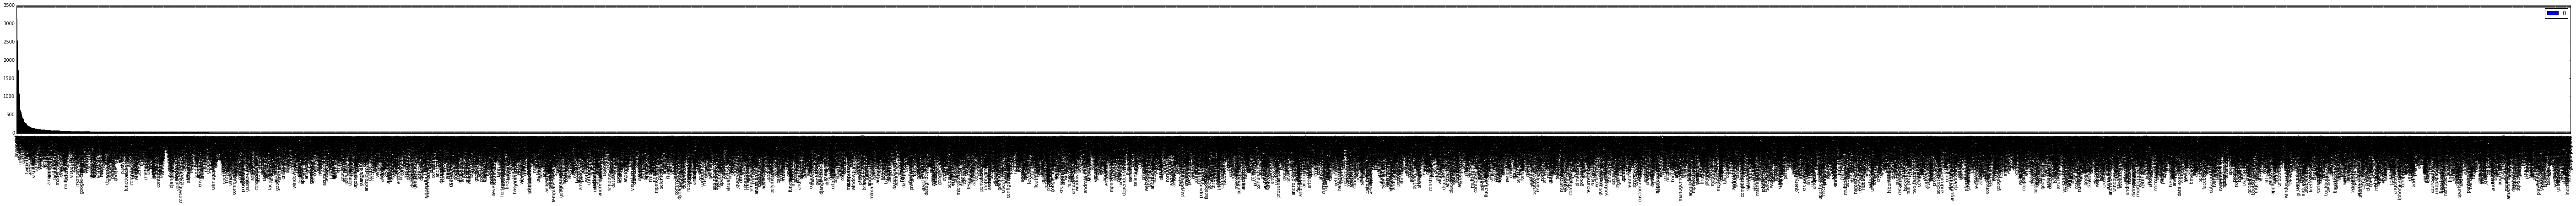

In [10]:
df = pandas.DataFrame.from_dict(ze_dict_ordered, orient='index')
df.plot(kind='bar',figsize=(100,5))
ax = plt.gca()
fig = ax.get_figure()
fig.savefig('tag_distribution.png')